# **AP157 Machine Learning Lab Assignment**
## Module A1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information

_Full Name (Last Name, First Name)_: Quiamjot, Allyn Christian\
_Student No._: 2021-07198\
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: Feb 22, 2024    1:46 AM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: ALLYN CHRISTIAN QUIAMJOT**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*


PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*
2. Get the best-fit curve for polynomial degrees $d=0$ to 14 for the training set. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*
3. Get the rms errors for both the training and cross-validation sets (for the best-fit curve from Step 2). *(10 pts.)*
4. Plot rms errors for both the training and cross-validation sets against polynomial degree $d$ (as in Fig. 8.14). *(20 pts.)*


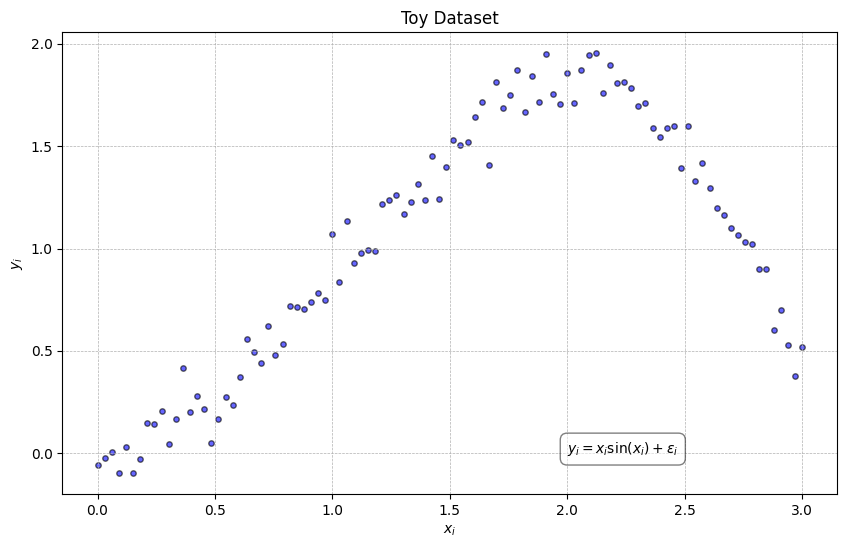

In [449]:
import numpy as np
import matplotlib.pyplot as plt 

n = 100         # number of toy data points

#   creating the random data points with added noise from a normal distribution
x_points = np.linspace(0,3,n)
y_points = x_points * np.sin(x_points) + np.random.normal(0,0.1,size=n)

#   plotting the toy dataset
plt.figure(figsize=(10,6))
plt.scatter(x_points, y_points, color = 'blue', alpha = 0.6, edgecolor='black', s = 15)
plt.title('Toy Dataset')
plt.xlabel('$x_i$')
plt.ylabel('$y_i$')
plt.grid(linestyle='--', linewidth=0.5)
plt.annotate('$y_i = x_i\sin(x_i)+\epsilon_i$', (2, 0), bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.5'))
plt.show()

The dataset consists of 100 points. The random normal distribution adds variance to it and every generated dataset is different from one another

In [450]:
#   this chunk of code splits the dataset into training,
#   cross-validation, and test sets
from sklearn.model_selection import train_test_split

#   half of the data for training, the other half to be split into validation and test sets
x_train, x_test, y_train, y_test = train_test_split(x_points,y_points, train_size=0.5)

#   divides the remaining half equally into cross validation and test sets
x_val, x_test, y_val, y_test = train_test_split(x_test,y_test, train_size=0.5)


In [451]:
#   pairing the x and y values of the training set, and sorting its 
#   x values in ascending order for ease of plotting
dd = []
for i in range(len(x_train)):
    dd.append([x_train[i],y_train[i]])

dd.sort()

#   creates a list of the sorted x values (training set)
x_train_sorted = [pair[0] for pair in dd]

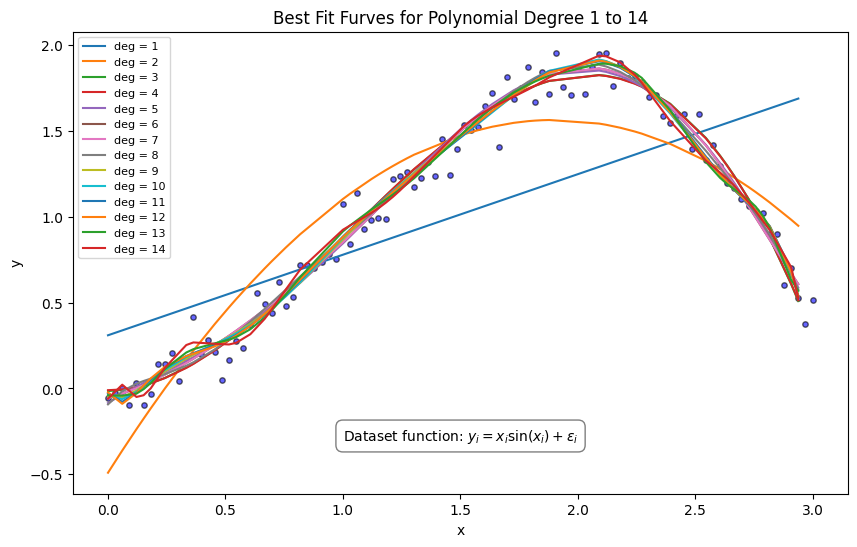

In [452]:
#   plotting toy data set to be layered with polynomial curves on top
plt.figure(figsize=(10,6))
plt.scatter(x_points, y_points, color = 'blue', alpha = 0.6, edgecolor='black', s = 15)
plt.xlabel('x')
plt.ylabel('y')

#   lists to store root mean square error for training and cross validation
rmsee = []; rmsee2 = []

#   loop to create and plot best fit polynomial curves from degree 1 to 14
for i in range(1,15):
    k = np.polyfit(x_train,y_train,i)   #   stores coeffecients of polynomial of degree i in k
    p = np.poly1d(k)                    #   creates a polynomial function p using the coefficients
    y_curve = p(x_train_sorted)         #   computes y values of the polynomial curve using the sorted x values

    #   plotting the polynomial curve
    plt.plot(x_train_sorted,y_curve,label = 'deg = '+str(i))
    plt.title('Best Fit Furves for Polynomial Degree 1 to 14')
    plt.legend(loc='upper left',fontsize=8)

    # calculating and storing RMSE for the training and cross validation sets, respectively
    rmsee.append(np.sqrt(np.sum(((y_train-p(x_train)))**2)/len(x_train)))
    rmsee2.append(np.sqrt(np.sum(((y_val-p(x_val)))**2)/len(x_val)))

plt.annotate('Dataset function: $y_i = x_i\sin(x_i)+\epsilon_i$', (1, -0.3), bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.5'))
plt.show()

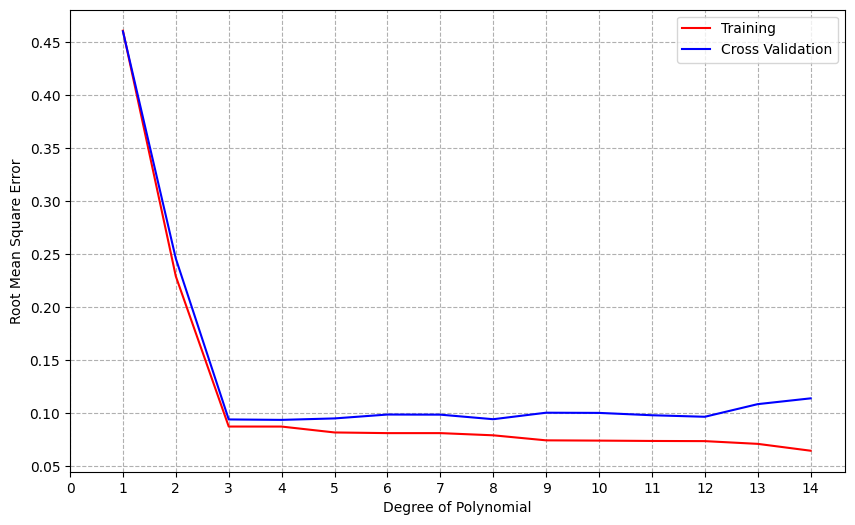

In [453]:
#   plotting the RMSE for the training and cross-validation set
plt.figure(figsize=(10,6))
plt.plot(np.arange(1, 15), rmsee, color='r', label='Training')
plt.plot(np.arange(1, 15), rmsee2, color ='blue', label='Cross Validation')
plt.xticks(range(0, 15))
plt.xlabel('Degree of Polynomial')
plt.ylabel('Root Mean Square Error')
plt.grid(linestyle='--')
plt.legend()
plt.show()

Initially, both the training and cross-validation RMSEs are high but decreases. This means that the model is getting better at learning patterns from the data effectively without memorizing the training set.

On degree 1 and 2, both RMSEs are close but are still high which indicates underfitting. The generated polynomial curve was not able to capture the trend well enough.

If the training RMSE is significantly lower than the validation RMSE and remains so with further training, this may indicate overfitting. This is not ideal since the model somehow "learned the noise" which makes it less effective at predicting unseen data. As observed in the plot, increasing the polynomial degree too much also increases the cross-validation RMSE which indicates overfitting.

The ideal polynomial curve should have both low RMSEs while being relatively close to each other. In this case, it is mostly in the polynomial degree 3.